In [17]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_excel('../原始数据/附件1：物流网络历史货量数据.xlsx')
df

,场地1,场地2,日期,货量
0,DC3,DC5,2021-01-01,3
1,DC3,DC10,2021-01-01,4
2,DC3,DC14,2021-01-01,4
3,DC5,DC3,2021-01-01,41
4,DC5,DC9,2021-01-01,3
...,...,...,...,...
177842,DC73,DC5,2022-12-31,2479
177843,DC73,DC8,2022-12-31,150
177844,DC73,DC10,2022-12-31,8116
177845,DC73,DC14,2022-12-31,6139


In [19]:
# 添加年份列
ddf = df.copy()
ddf['年份'] = ddf['日期'].dt.year
ddf['月日'] = df['日期'].dt.strftime('%m-%d')
ddf

,场地1,场地2,日期,货量,年份,月日
0,DC3,DC5,2021-01-01,3,2021,01-01
1,DC3,DC10,2021-01-01,4,2021,01-01
2,DC3,DC14,2021-01-01,4,2021,01-01
3,DC5,DC3,2021-01-01,41,2021,01-01
4,DC5,DC9,2021-01-01,3,2021,01-01
...,...,...,...,...,...,...
177842,DC73,DC5,2022-12-31,2479,2022,12-31
177843,DC73,DC8,2022-12-31,150,2022,12-31
177844,DC73,DC10,2022-12-31,8116,2022,12-31
177845,DC73,DC14,2022-12-31,6139,2022,12-31


In [20]:
# 按月日排序
ddf.sort_values(by='月日').reset_index(drop=True, inplace=True)
ddf

,场地1,场地2,日期,货量,年份,月日
0,DC3,DC5,2021-01-01,3,2021,01-01
1,DC3,DC10,2021-01-01,4,2021,01-01
2,DC3,DC14,2021-01-01,4,2021,01-01
3,DC5,DC3,2021-01-01,41,2021,01-01
4,DC5,DC9,2021-01-01,3,2021,01-01
...,...,...,...,...,...,...
177842,DC73,DC5,2022-12-31,2479,2022,12-31
177843,DC73,DC8,2022-12-31,150,2022,12-31
177844,DC73,DC10,2022-12-31,8116,2022,12-31
177845,DC73,DC14,2022-12-31,6139,2022,12-31


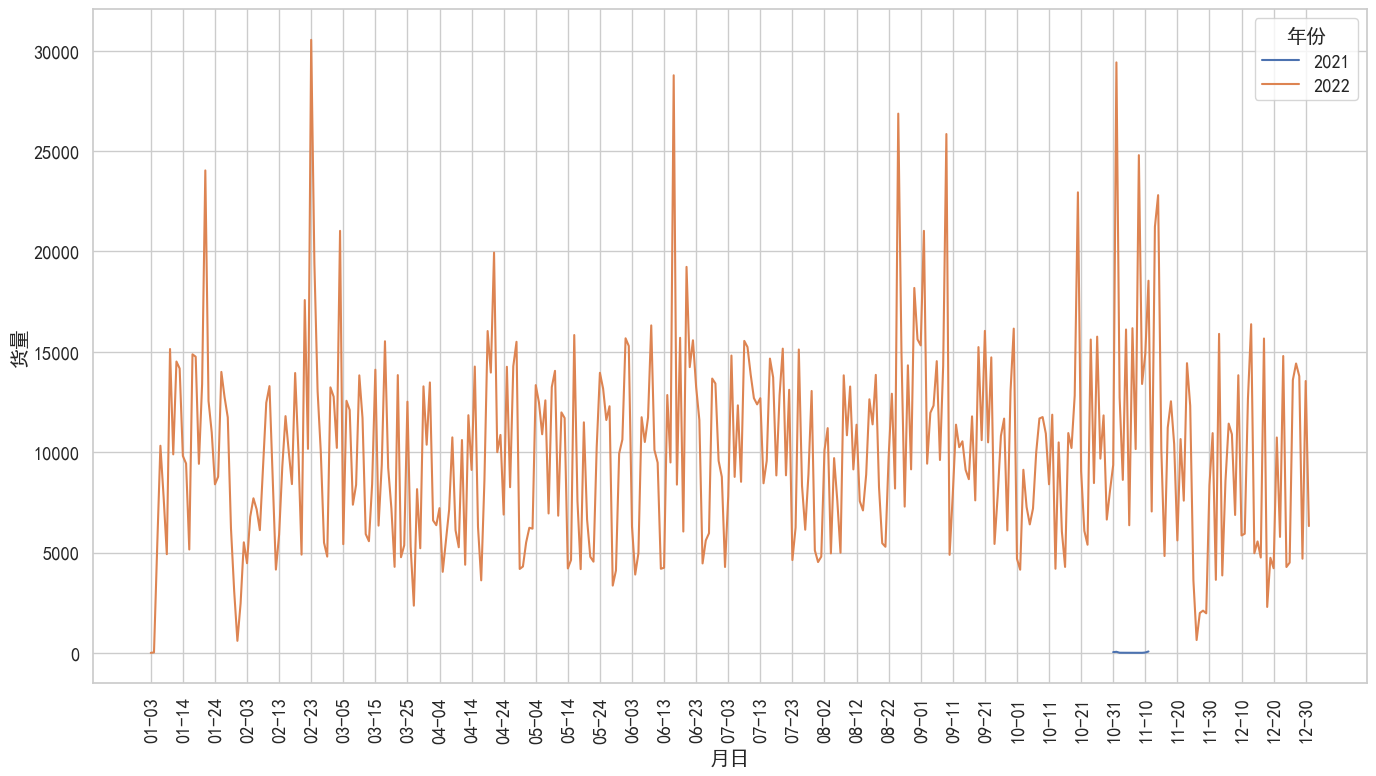

In [54]:
# 以年份为类目，按月份，DC25→DC62 货量-折线图
data = ddf[(ddf['场地1'] == 'DC25') & (ddf['场地2'] == 'DC62')].sort_values(by='月日').reset_index(drop=True)

style = 'whitegrid'

sns.set(font='SimHei', font_scale=1.2, style=style)
plt.figure(figsize=(14, 8))
sns.lineplot(data, x='月日', y='货量', hue='年份', palette='deep')

plt.xticks(data['月日'].unique()[::10], rotation=90)
plt.tight_layout()
plt.savefig(f'以年份为类目，按月份，DC25→DC62 货量-折线图-{style}.svg')
plt.show()